# Candidate name:- RAMKRISHNA SHARMA

## Task 2 :  Prediction using Unsupervised ML

## Problem Statement:-  From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Load and print the iris dataset 

In [4]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Properties and Shape of the dataset

In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


(150, 6)

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
df['Species'].nunique()

3

## Data Visualization

## ScatterPlot

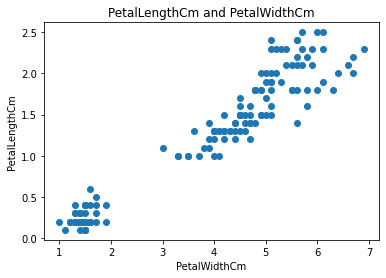

In [13]:
fig,ax = plt.subplots()
ax.scatter(df['PetalLengthCm'],df['PetalWidthCm'])            
plt.title('PetalLengthCm and PetalWidthCm') 
ax.set_ylabel('PetalLengthCm')
ax.set_xlabel('PetalWidthCm')
plt.show()

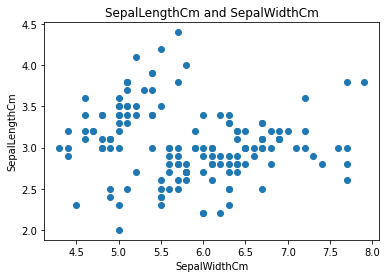

In [14]:
fig,ax = plt.subplots()
ax.scatter(df['SepalLengthCm'],df['SepalWidthCm'])            #Plotting the distribution of scores
plt.title('SepalLengthCm and SepalWidthCm') 
ax.set_ylabel('SepalLengthCm')
ax.set_xlabel('SepalWidthCm')
plt.show()

## PairPlot 

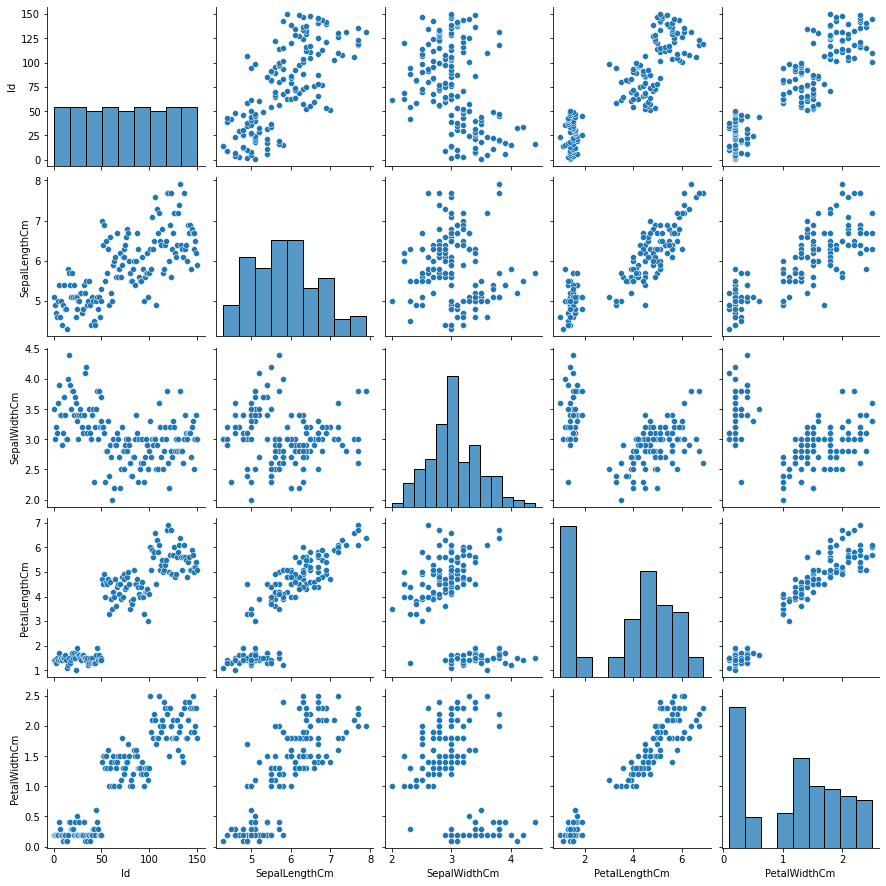

In [15]:
sns.pairplot(df)

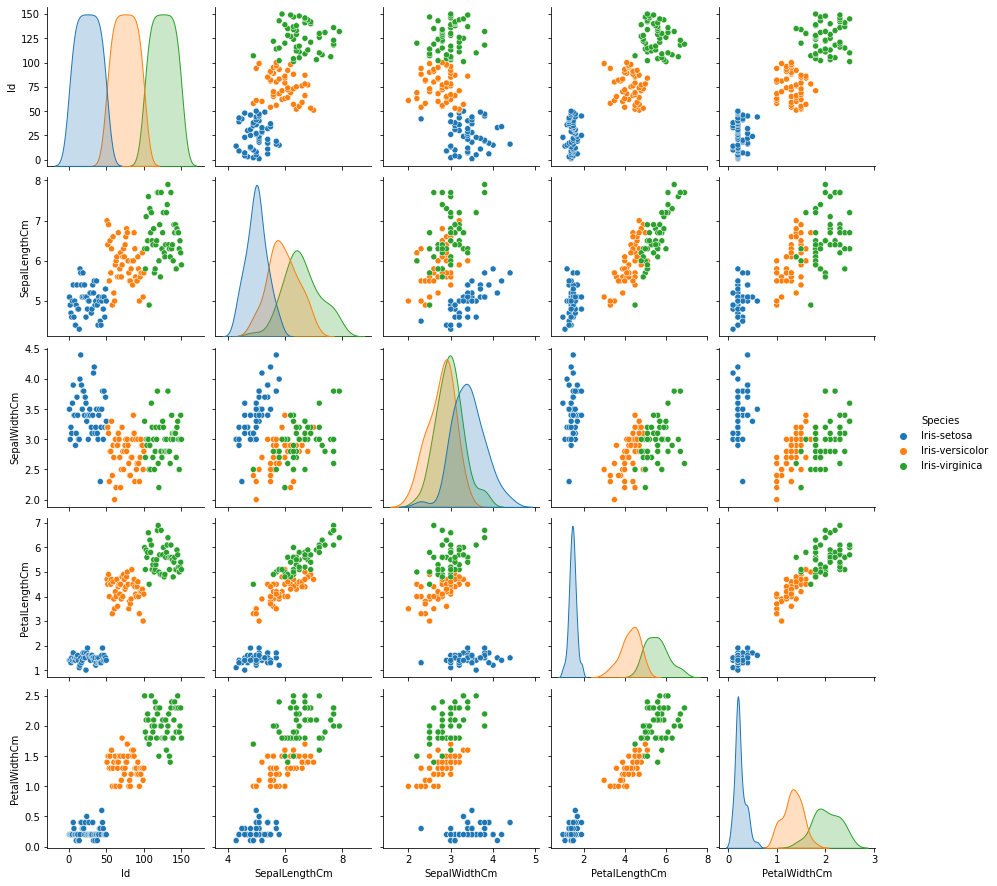

In [16]:
sns.pairplot(df,hue="Species")

## Scatter plot 

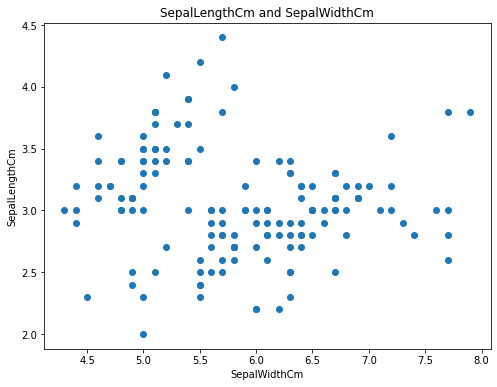

In [19]:
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(df['SepalLengthCm'],df['SepalWidthCm'])            #Plotting the distribution of scores
plt.title('SepalLengthCm and SepalWidthCm') 
ax.set_ylabel('SepalLengthCm')
ax.set_xlabel('SepalWidthCm')
plt.show()

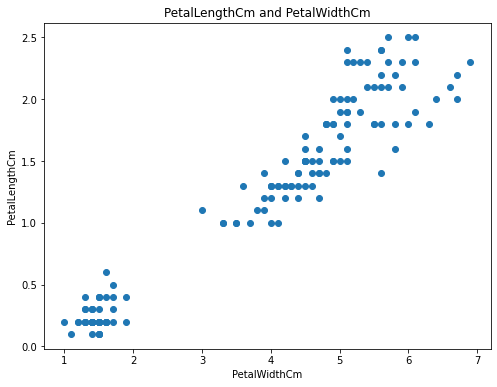

In [20]:
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(df['PetalLengthCm'],df['PetalWidthCm'])            #Plotting the distribution of scores
plt.title('PetalLengthCm and PetalWidthCm') 
ax.set_ylabel('PetalLengthCm')
ax.set_xlabel('PetalWidthCm')
plt.show()

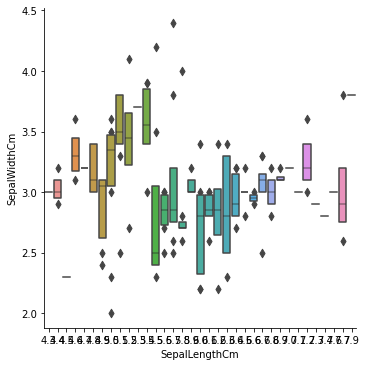

In [21]:
sns.catplot(x='SepalLengthCm',y='SepalWidthCm',data=df,kind='boxen')

## Heatmap 

<AxesSubplot:>

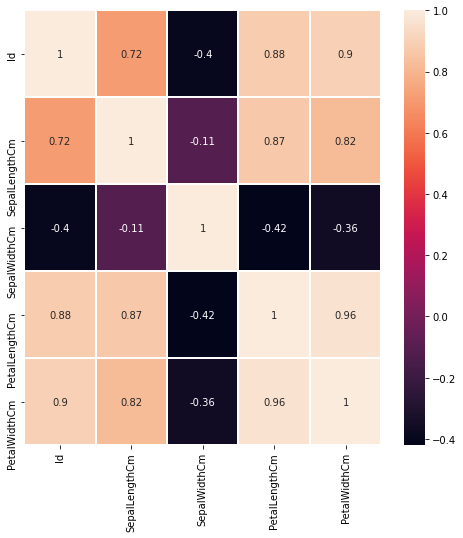

In [22]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),linewidths=1,annot=True)

## Jointplot 

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


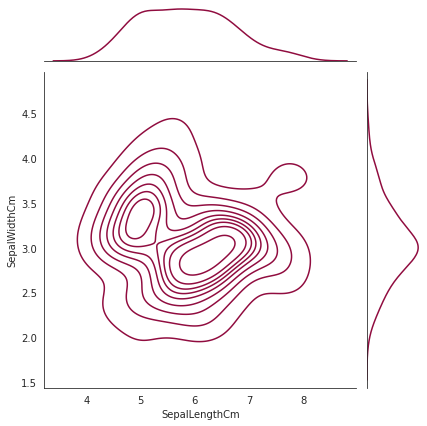

In [23]:
with sns.axes_style('white'):
    sns.jointplot("SepalLengthCm", "SepalWidthCm", df, kind='kde',color="#900C3F");

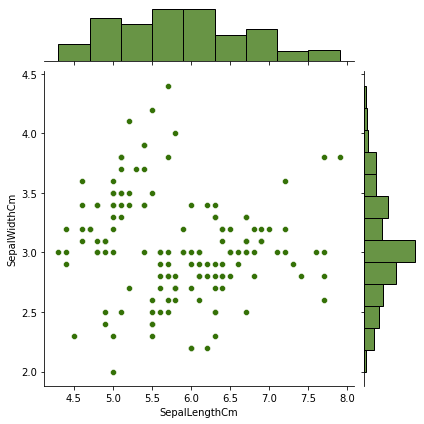

In [24]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df,color="#357107")

## Statistical estimation 

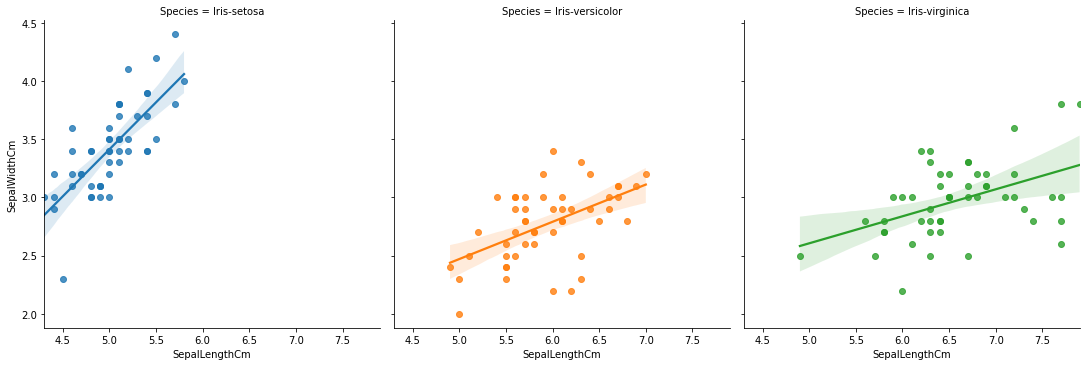

In [25]:
sns.lmplot(data=df, x="SepalLengthCm", y="SepalWidthCm", col="Species", hue="Species")

<AxesSubplot:>

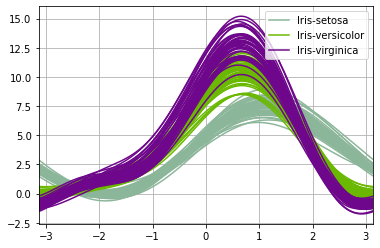

In [26]:
df1=df

from pandas.plotting import andrews_curves
andrews_curves(df1.drop("Id", axis=1), "Species")

<AxesSubplot:>

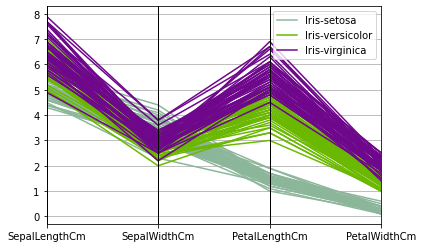

In [27]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df1.drop("Id", axis=1), "Species")

## Elbow Method using within-cluster-sum-of-squares(wcss) 

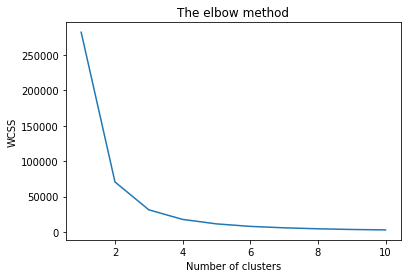

In [28]:
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

### From this we choose the number of clusters as ** '3**'. 

## Initialization and fitting using K-means++¶ 

In [29]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Visualizing clusering¶ 

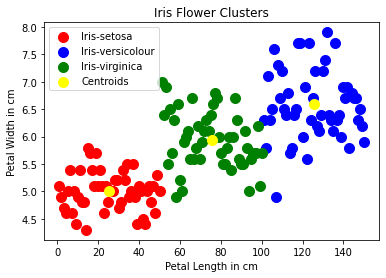

In [31]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

# THANK YOU